In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#FF9896']
custompalette = sns.color_palette(sns.color_palette(np.array(colors)[[8,10,1,7,6,5,0,4,9,2,3]],desat=0.8))
sns.set_palette(custompalette)

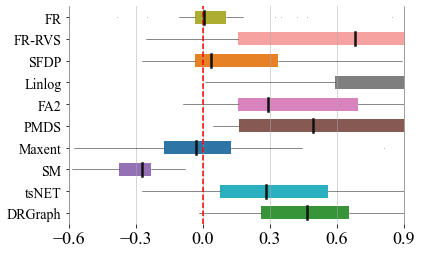

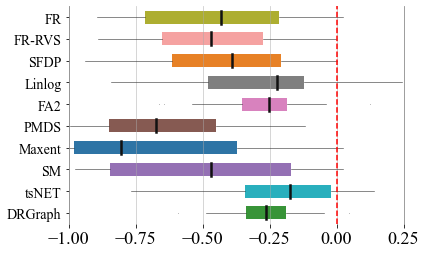

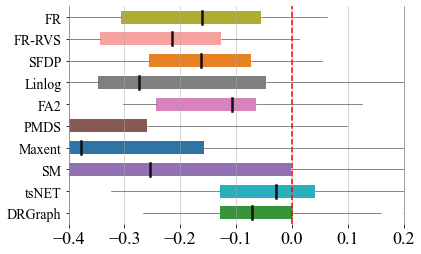

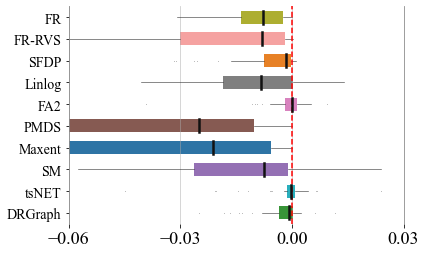

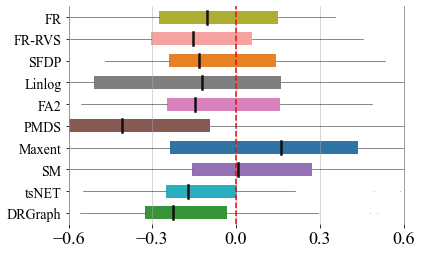

In [4]:
xticks_set = [[-0.6,-0.3,0.0,0.3,0.6,0.9],
        [-1.0,-0.75,-0.5,-0.25,0,0.25],
         [-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2],
         [-0.06,-0.03,0.0,0.03],
         [-0.6,-0.3,0.0,0.3,0.6]]
idx = 0

metrics = ["SE","NP1","NP2","EC","MA"]
for m in metrics:
#     df_rd = pd.read_csv("./results/RD_" + m +".csv",index_col=0)
    df = pd.read_csv("./results/" + m +".csv",index_col=0)
    df_diff =  df.sub(df["t-FDP"],axis='index').div(df["t-FDP"],axis='index')[df.columns[:-1]][:37]
    
    plt.figure(figsize=(6,4))
    ax = plt.gca()
    # ax.set_yscale('log')

    ax.axis("on")
    ax.spines["right"].set_visible(True)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(True)

    ax.spines["right"].set_color("#888888")
    ax.spines["left"].set_color("#888888")

    # ax.tick_params(which='major', length=10)
    ax.grid( which='major', color='#AAAAAA',alpha=0.6)

#     ax.grid(b=True, which='minor', color='#AAAAAA', linestyle='--',alpha=0.4)
    # sns.set_palette('Set2')
    box_plot  = sns.boxplot(data = df_diff
                            ,orient="h",saturation=1.0,fliersize=0.1,linewidth=0.0,width=0.6)


    # box_plot.get
    lines = ax.get_lines()
    categories = ax.get_yticks()

    for cat in categories:
        line = lines[cat*6+0]
        line.set_linewidth(0.6)
        line = lines[cat*6+1]
        line.set_linewidth(0.6)
        line = lines[cat*6+2]
        line.set_visible(False)
        line = lines[cat*6+3]
        line.set_visible(False)
        line = lines[cat*6+4]
        line.set_linewidth(2.5)
        line.set_color("#111111")

    xticks = xticks_set[idx]
    ax.set_xticks(xticks)
    plt.xlim(xticks[0],xticks[-1])
    idx += 1
    plt.axvline(x = 0, color = 'r', linestyle = 'dashed')
#     ax.xaxis.set_minor_locator(MultipleLocator(0.25))
    plt.yticks(fontsize=14,fontname="Times New Roman")
    plt.xticks(fontsize=18,fontname="Times New Roman")
    plt.savefig("./Figs/SuppFig9RelativeBoxplot/" + m + ".svg")
    plt.show()